# Titanic Dataset

## 1. Introduction

On April 15, 1952, one of the most famous ship sank killing 1502 people. Life and death is all about luck but there are many more factors that played role. There were few group of people that were more likely to survive than others. In this Kaggle challenge our objective is to predict that factors that played role in making one group more fortunate than the other.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import seaborn as sns; sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

C:\Users\Rukhsaar\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#importing the data
titanic_train_main = pd.read_csv("titanic/train.csv")
titanic_test_main = pd.read_csv("titanic/test.csv")
print("train data\n\n", titanic_train_main.head())
print("\n\ntest data\n", titanic_test_main.head())

train data

    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN 

## Description of Data
We have two CSV file – 1) Train data and 2) Test Data. The main difference between those two files are that the train data has the column survived and in the test data we need to predict that column survived. 


In [3]:
# Describe the train data
titanic_train_main.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# checking data types
print("Train Data type\n\n",titanic_train_main.dtypes)
print("\n\nTest Data type\n\n",titanic_test_main.dtypes)

Train Data type

 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Test Data type

 PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


Our target variable is ‘Survived’ which is Categorical. 1 means Survived and Zero indicated Not Survived. Lets looks at the Features:

## Data Cleaning and Preprocessing:
#### Step 1: 
Merge the train and test data: As we will be training on Train data and then testing on Test Data, we need to merge both the data’s to clean them on the same scale. 

In [5]:
# merging train and test data using pd.concat
titanic = pd.concat([titanic_train_main,titanic_test_main],axis =0,
                    ignore_index=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### step 2: Adding columns. 
Before we go for checking missing values or or anything I want to try my analysis by creating a new column named title to find out if there is any relationship between a persons title or rank example Mr, Mrs, Doc or not. It might be useful for us in finding the missing age. 

In [6]:
#Generating title
titanic['title'] = titanic.Name.apply(lambda name: name.split(',')[1].split()[0])
titanic.title.value_counts()
titanic.head()
title_survived = titanic[['Survived','title']].groupby(['title']).sum()
print("title:",title_survived)


title:            Survived
title              
Capt.           0.0
Col.            1.0
Don.            0.0
Dona.           0.0
Dr.             3.0
Jonkheer.       0.0
Lady.           1.0
Major.          1.0
Master.        23.0
Miss.         127.0
Mlle.           2.0
Mme.            1.0
Mr.            81.0
Mrs.           99.0
Ms.             1.0
Rev.            0.0
Sir.            1.0
the             1.0


In [7]:
#combining titles and mapping them
title = {'Mr.':1, 'Mrs.':2, 'Miss.':3, 'Master.':4, 'Don.':5 , 'Rev.':5 , 'Dr.':5, 'Mme.':2,
       'Ms.':3, 'Major.':5, 'Lady.':5, 'Sir.':5, 'Mlle.':5, 'Col.':5, 'Capt.':5, 'the':5,
       'Jonkheer.':1 }
titanic.title = titanic.title.map(title)

titanic.title = titanic.title.fillna(2)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,3.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,2.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1.0
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,1.0


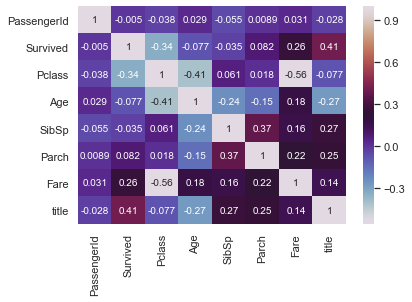

In [8]:
#checking correlation between all the features
titanic_corr = titanic.corr()
sns.heatmap(titanic_corr, annot = True, cbar = True, cmap = "twilight")

The above columns shows that the age and survived have -7% correlation where as P class and survived are inversely correlated. We also see that the title and Survived are 41% correlated

### Creating new column Family
we also see that SibSp and Parch that is Parents, Sibblings and spouse all belong to a family. So we will go forward and combine the count of Sibling/Spouse and Parent/Children. This feature together might be important as if having a larger family was important to get a spot on life boat or being alone. 


In [9]:
#adding a new column family and deleting parch and Sibsp
titanic["Family"] = titanic.Parch + titanic.SibSp + 1
titanic = titanic.drop(columns = ["SibSp", "Parch"])

From the above visualization it is clear that there is a relation between Survival and title. 

### Lets check the missing values


In [10]:
# finding percentage of null value in each column
null_value = titanic.isnull().sum()/len(titanic)*100
null_value

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
title           0.000000
Family          0.000000
dtype: float64

We see that Survived have 31.93% missing values which is because the test data doesn’t have Survived column. Age has 20.09% missing values, Cabin have 77.46% and Embarked 0.15%.

### Fill the missing values and drop columns that are not necessary
Let's drop PassengerId, Name as they are not necessary
we will also drop cabin as it has 77.4% missing values and the rest 22.6% are not related in any way
We will also be dropping ticket as it has number which is not related in any way


In [11]:
#droping passengerId, Name, Cabin and ticket
titanic = titanic.drop(columns = ["PassengerId","Name","Cabin","Ticket"])

As Embarked has 0.15% of missing value, I will use mode to to fill it.


In [12]:
#Finding the sum of counts of Embarked
titanic.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [13]:
# as S occurs the highest number of time, we will use S 
titanic.Embarked = titanic.Embarked.fillna("S")

### Creating Dummy Variables: 
we will be creating dummy variables for all categorical variables as the algorithm can take only numbers and letters. We will use pandas pd.get_dummies() to convert Sex, Embarked, Pclass and title to dummy variable

In [14]:
#creating dummy variable for sex embarkked p class nad title
titanic = pd.get_dummies(titanic, columns = ["Sex","Embarked","Pclass","title"])

In [15]:
#dropping one column from the dummies created
titanic = titanic.drop(columns = ["Embarked_Q","Pclass_1","Sex_female","title_5.0"])

### Filling missing values for age
Rather than using mean, from the above correlation it shows that Age is highly negatively correlated with Pclass.It is also dependent on age and title. We will group them and use median to predict the age.

I tried 2 analysis for predicting age. One I filled age using median and the other one age using KNN. I will be attaching results for both but my KNN gave me better result then Median. I have also attached code for median
#titanicgroupage = titanic.groupby(["Sex","Pclass","title"])
#titanicgroupage.Age.median()
#titanic.Age = titanicgroupage.Age.apply(lambda x:x.fillna(x.median()))

### Missing value for Fare
Fare having only 0.7% of missing data, Fare can also be predicted using KNN. But to KNN first we need to have all data as numerical. It can't take Male/Female.

In [16]:
#using knn imputer to fill the null values
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
titanicpd = imputer.fit_transform(titanic)
titanic = pd.DataFrame(titanicpd, columns = titanic.columns)
titanic = titanic.astype(int)

Here we are creating a creating a fuction to split the data into train and test 

In [17]:
def train(data): #creating function for train
    train = data.iloc[:891,:]
    return train
def test(data): #creating function for test
    test = data.iloc[891:,:]
    test = test.drop(columns = "Survived")
    return test
    

## Types of Data to create a model
We will create different sets of data on which we will train our model. 

### Titanic1 
In this data type we will standardize Age, Fare and Family columns. 

In [18]:
Titanic1 = titanic.copy()
col_names = ["Age","Fare","Family"]
features = Titanic1[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
Titanic1[col_names] = features
Titanic1.head()

,Survived,Age,Fare,Family,Sex_male,Embarked_C,Embarked_S,Pclass_2,Pclass_3,title_1.0,title_2.0,title_3.0,title_4.0
0,0,-0.595809,-0.499677,0.073352,1,0,1,0,1,1,0,0,0
1,1,0.540263,0.737458,0.073352,0,1,0,0,0,0,1,0,0
2,1,-0.311791,-0.499677,-0.558346,0,0,1,0,1,0,0,1,0
3,1,0.327250,0.389514,0.073352,0,0,1,0,0,0,1,0,0
4,0,0.327250,-0.480347,-0.558346,1,0,1,0,1,1,0,0,0


In [ ]:
#dividing the data into train and test
titanic1_train = train(Titanic1)
titanic1_test = test(Titanic1)
titanic1_train.head()

## Titanic2
In this we are not going to normalize the data. It is the same data as titanic data

In [25]:
# Used data without normalization. So no need to pre process. Just change it into train and test
titanic2 = titanic.copy()
titanic2_train = train(titanic2)
titanic2_test = test(titanic2)

## Titanic 3
In this we will use ISOMAP for Dimesnion reduction. We will set the n components as 3

In [26]:
from sklearn.manifold import Isomap
titanic3 = titanic.copy()
X = titanic3.drop(columns = "Survived")
y = titanic3["Survived"]
iso = Isomap(n_components=3)
titanic3= iso.fit_transform(X)
titanic3 = pd.DataFrame(titanic3)
titanic3["Survived"] = y
titanic3_train = train(titanic3)
titanic3_test = test(titanic3)
titanic3_test.head()

,0,1,2
891,-21.979981,-0.646153,9.375414
892,-23.678811,-2.175473,23.669549
893,-24.993206,-4.262507,36.201751
894,-22.895129,-0.491196,2.824839
895,-18.273659,0.550595,-8.122668
...,...,...,...
1304,-24.243047,-0.560662,-1.762583
1305,20.768355,4.411655,1.382773
1306,-21.852895,-0.896259,13.575859
1307,-24.243047,-0.560662,-1.762583


## Titanic 4
In this we will use TSNE for dimension reduction.
from sklearn.manifold import Isomap


In [27]:
titanic4 = titanic.copy()
X = titanic4.drop(columns = "Survived")
y = titanic4["Survived"]
tsne = TSNE(n_components=3)
titanic4= iso.fit_transform(X)
titanic4 = pd.DataFrame(titanic4)
titanic4["Survived"] = y
titanic4_train = train(titanic4)
titanic4_test = test(titanic4)

## Titanic 5
In this data I converted age to categories. I divided it into 4 group 0-18, 19-35, 36-65 and 65 and above

In [28]:
titanic_cat = titanic.copy()
titanic_cat["age_cat"] = 4
titanic_cat.loc[(titanic_cat["Age"] >=0) & (titanic_cat["Age"] <=18),"age_cat"] = 1
titanic_cat.loc[(titanic_cat["Age"] >=19) & (titanic_cat["Age"] <=35),"age_cat"] = 2
titanic_cat.loc[(titanic_cat["Age"] >=36) & (titanic_cat["Age"] <=65),"age_cat"] = 3
titanic_cat = titanic_cat.drop(columns = "Age")
titanic_cat = pd.get_dummies(titanic_cat, columns = ["age_cat"])
titanic_cat = titanic_cat.drop(columns ="age_cat_4")
titanic_cat_train = train(titanic_cat)
titanic_cat_test = test(titanic_cat)

## Titanic 6
In this data we will use the age column that we converted into category and standardize the Fare and Family column. 

In [31]:
titanic_cat_stand = titanic_cat.copy()
col_names = ["Fare","Family"]
features = titanic_cat_stand[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
titanic_cat_stand[col_names] = features
titanic_cat_stand.head()
titanic_cat_stand_train = train(titanic_cat_stand)
titanic_cat_stand_test = test(titanic_cat_stand)

## Defining Algorithms to run it under different data sets
 

In [35]:
def logregmodel(X, y):
    model = LogisticRegression(solver = "liblinear", random_state = 0)
    accuracy_logreg = cross_val_score(model,X,y, cv =10,scoring = "accuracy")
    return accuracy_logreg, np.mean(accuracy_logreg)


### KNN model

In [36]:
def KNN(X, y):
    KNN_model = KNeighborsClassifier()
    param_grid = {'n_neighbors': [1,2,3,4,5,6]}
    cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
    grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',
                        return_train_score=False)
    grid.fit(X,y)
    print("Best Parameter: {}".format(grid.best_params_))
    print("Best Cross Vlidation Score: {}".format(grid.best_score_))
    

### SVC

In [38]:
def model_data(X, y):
    param_grid = {'C': [.1, 1, 5, 10, 50],
                  'gamma': [0.0001, 0.0005, 0.001, 0.005],
                   'kernel': ["rbf","linear"]}
    svc = SVC()
    
    grid = GridSearchCV(svc, param_grid, cv = 5, scoring='accuracy')
    grid.fit(X, y)
    print(grid.best_params_)
    print(grid.best_score_)

### Decision Tree Classifier

In [39]:
def Dectree(X,y):
    param_grid = {"min_samples_leaf":[2,3,4,5],
                 "max_depth":[3,4,5,6,7,8,10],
                 "criterion": ["gini","entropy"]}

    model = DecisionTreeClassifier()
    grid = GridSearchCV(model,param_grid,scoring = "accuracy")
    grid.fit(X,y)
    print("Grid best parameters",grid.best_params_)
    print("grid best score",grid.best_score_)
    print("Tree best estimator", grid.best_estimator_)
    

### Random Forest

In [40]:
def RanFor(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=0)
    n = [10,30,50,100,200,500]
    for i in n:
        model = RandomForestClassifier(n_estimators = i, random_state = 0, min_samples_leaf = 3)
        model.fit(X_train, y_train)
        y_test_hat = model.predict(X_test)
        acc_ranfor = accuracy_score(y_test,y_test_hat, normalize = True) * 100 
        print("accuracy score with n =",i,",", acc_ranfor)

In [41]:
def allalgo(data):
    X = data.drop(columns = ["Survived"])
    y = data["Survived"]
   
    print("Logistic Regression\n\n")
    print(logregmodel(X,y))
    print("\n\nKNN Model\n\n")
    print(KNN(X, y))
    print("\n\nSVC Model\n\n")
    print(model_data(X,y))
    print("\n\nClassification tree Model\n\n")
    print(Dectree(X, y))
    print("\n\nRandom Forest\n\n")
    return RanFor(X, y)
    
    

## Running all Algorithms on Normalized data - Titanic 1
 we have functiosn saved above. Lets call them for each dataset

In [42]:
allalgo(titanic1_train)

Logistic Regression


(array([0.81111111, 0.85393258, 0.7752809 , 0.87640449, 0.80898876,
       0.79775281, 0.82022472, 0.82022472, 0.85393258, 0.87640449]), 0.8294257178526843)


KNN Model


Best Parameter: {'n_neighbors': 5}
Best Cross Vlidation Score: 0.8248697508003264
None


SVC Model


{'C': 50, 'gamma': 0.005, 'kernel': 'rbf'}
0.8349946644906158
None


Classification tree Model


Grid best parameters {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3}
grid best score 0.8361496453455526
Tree best estimator DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
None


Random Forest


accuracy score with n = 1

## Running all Algorithms on Regular data - Titanic 2

In [43]:
allalgo(titanic2_train)

Logistic Regression


(array([0.83333333, 0.85393258, 0.7752809 , 0.86516854, 0.82022472,
       0.78651685, 0.82022472, 0.82022472, 0.85393258, 0.86516854]), 0.8294007490636706)


KNN Model


Best Parameter: {'n_neighbors': 3}
Best Cross Vlidation Score: 0.7351704224468019
None


SVC Model


{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.8305065595380077
None


Classification tree Model


Grid best parameters {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3}
grid best score 0.8361496453455526
Tree best estimator DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
None


Random Forest


accuracy score with n 

## Running all Algorithms on ISOMAP - Titanic 3

In [44]:
allalgo(titanic3_train)

Logistic Regression


(array([0.54444444, 0.56179775, 0.65168539, 0.65168539, 0.64044944,
       0.73033708, 0.70786517, 0.68539326, 0.68539326, 0.6741573 ]), 0.6533208489388265)


KNN Model


Best Parameter: {'n_neighbors': 3}
Best Cross Vlidation Score: 0.7227732094658214
None


SVC Model


{'C': 10, 'gamma': 0.005, 'kernel': 'rbf'}
0.6847404431611324
None


Classification tree Model


Grid best parameters {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 5}
grid best score 0.6959073504488105
Tree best estimator DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
None


Random Forest


accuracy score with n = 1

## Running all Algorithms on TSNE - Titanic 4

In [45]:
allalgo(titanic4_train) # we have this functions saved above. Lets call them for each data set

Logistic Regression


(array([0.54444444, 0.56179775, 0.65168539, 0.65168539, 0.64044944,
       0.73033708, 0.70786517, 0.68539326, 0.68539326, 0.6741573 ]), 0.6533208489388265)


KNN Model


Best Parameter: {'n_neighbors': 3}
Best Cross Vlidation Score: 0.7216496139602033
None


SVC Model


{'C': 10, 'gamma': 0.005, 'kernel': 'rbf'}
0.6847404431611324
None


Classification tree Model


Grid best parameters {'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2}
grid best score 0.697074885443475
Tree best estimator DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
None


Random Forest


accuracy score with 

## Running all Algorithms on Age as Categorical - Titanic 5

In [50]:
allalgo(titanic_cat_train)

Logistic Regression


(array([0.8       , 0.85393258, 0.7752809 , 0.88764045, 0.80898876,
       0.80898876, 0.82022472, 0.83146067, 0.86516854, 0.86516854]), 0.8316853932584269)


KNN Model


Best Parameter: {'n_neighbors': 5}
Best Cross Vlidation Score: 0.7912183792605612
None


SVC Model


{'C': 1, 'gamma': 0.0001, 'kernel': 'linear'}
0.8327537505492437
None


Classification tree Model


Grid best parameters {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 3}
grid best score 0.8215805661917017
Tree best estimator DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
None


Random Forest


accuracy score w

From the above models we can see that the best Logistic Regression accuracy score is for Data titanic1 but for titanic_cat also the highest accuracy score is 88. So we will go with both. (77.6, 77.9)
Best KNN Model is for titanic1 with 81.4% accuracy (77.03)
Best SVC Model we will be running all teh 3 data's Titanic1, titanic2, titanic_cat
For Classification tree also we will be running all the above mentioned 3 models
For Random forest we will be running titanic_cat

## Running all Algorithms on Categorical and Standardized data - Titanic 6

In [51]:
allalgo(titanic_cat_stand_train)

Logistic Regression


(array([0.81111111, 0.85393258, 0.7752809 , 0.88764045, 0.80898876,
       0.79775281, 0.82022472, 0.83146067, 0.86516854, 0.86516854]), 0.8316729088639201)


KNN Model


Best Parameter: {'n_neighbors': 4}
Best Cross Vlidation Score: 0.8215491808423827
None


SVC Model


{'C': 50, 'gamma': 0.005, 'kernel': 'rbf'}
0.8361182599962339
None


Classification tree Model


Grid best parameters {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4}
grid best score 0.8215805661917017
Tree best estimator DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
None


Random Forest


accuracy score with

# Running the best Models

In [69]:
logreg_model1 = LogisticRegression(solver='liblinear',random_state =0)
logreg_model1.fit(titanic1_train.drop(columns = "Survived"),titanic1_train["Survived"])
y_test_hat = logreg_model1.predict(titanic1_test)
y_test_hat = y_test_hat.astype(int)
submit = pd.DataFrame({'PassengerId' : titanic_test_main["PassengerId"],
                       'Survived': y_test_hat})
submit.to_csv("submit_logtitanic1.csv", index=False)
print("Kaggle accuracy is 79.4")

Kaggle accuracy is 79.4


In [68]:
svc_titanic1 = SVC(kernel = "linear",C=5, gamma= 0.0001)
svc_titanic1.fit(titanic1_train.drop(columns = "Survived"),titanic1_train["Survived"])
y_test_hat3 = svc_titanic1.predict(titanic1_test)
y_test_hat3 = y_test_hat3.astype(int)
submit = pd.DataFrame({'PassengerId' : titanic_test_main["PassengerId"],
                       'Survived': y_test_hat3})
submit.to_csv("submit_svc.csv", index=False)
print("Kaggle accuracy is 78.4")

Kaggle accuracy is 78.4


In [54]:
svc_titanic1 = SVC(kernel = "linear",C=5, gamma= 0.0001)
svc_titanic1.fit(titanic1_train.drop(columns = "Survived"),titanic1_train["Survived"])
y_test_hat3 = svc_titanic1.predict(titanic1_test)
y_test_hat3 = y_test_hat3.astype(int)
submit = pd.DataFrame({'PassengerId' : titanic_test_main["PassengerId"],
                       'Survived': y_test_hat3})
submit.to_csv("submit_svc.csv", index=False)

In [67]:
model = DecisionTreeClassifier(max_depth= 5, min_samples_leaf = 2)
model.fit(titanic1_train.drop(columns = "Survived"),titanic1_train["Survived"])
y_test_hat3 = svc_titanic1.predict(titanic1_test)
y_test_hat3 = y_test_hat3.astype(int)
submittree = pd.DataFrame({'PassengerId' : titanic_test_main["PassengerId"],
                       'Survived': y_test_hat3})
submittree.to_csv("submit_tree.csv", index=False)
print("Kaggle accuracy is 78.4%")

Kaggle accuracy is 78.4%


In [66]:
logreg_modelcat = LogisticRegression(solver='liblinear',random_state =0)
logreg_modelcat.fit(titanic_cat_train.drop(columns = "Survived"),titanic_cat_train["Survived"])
y_test_hat1 = logreg_modelcat.predict(titanic_cat_test)
y_test_hat1 = y_test_hat1.astype(int)
submitcat = pd.DataFrame({'PassengerId' : titanic_test_main["PassengerId"],
                       'Survived': y_test_hat1})
submitcat.to_csv("submit_logtitaniccat.csv", index=False)

In [64]:
model = RandomForestClassifier(n_estimators = 500, random_state = 0, min_samples_leaf = 3)
model.fit(titanic_cat_train.drop(columns = "Survived"),titanic_cat_train["Survived"])
y_test_hat = model.predict(titanic_cat_test)
y_test_hat = y_test_hat.astype(int)
submit_cat_ranforest5001 = pd.DataFrame({'PassengerId' : titanic_test_main["PassengerId"],
                       'Survived': y_test_hat})
submit_cat_ranforest5001.to_csv("submit_catfor5001.csv", index=False)
print("Kaggle accuracy 80.3%")


Kaggle accuracy 80.3%


In [65]:
model = RandomForestClassifier(n_estimators = 200, random_state = 0, min_samples_leaf = 3)
model.fit(titanic_cat_stand_train.drop(columns = "Survived"),titanic_cat_stand_train["Survived"])
y_test_hat = model.predict(titanic_cat_stand_test)
y_test_hat = y_test_hat.astype(int)
submit_cat_ranforest2001 = pd.DataFrame({'PassengerId' : titanic_test_main["PassengerId"],
                       'Survived': y_test_hat})
submit_cat_ranforest2001.to_csv("submit_catfor2001.csv", index=False)
print("Kaggle accuracy 79.4")

Kaggle accuracy 79.4
